Implement the Gaussian na¨ıve Bayes algorithm to classify this dataset. Plot the decision boundary
of your model (similarly to the figure shown in the lecture slides). You may want to use the package
scipy.stats.multivariate normal to evaluate the multivariate normal distribution.

In [4]:
from sklearn.datasets import make_classification
n_classes = 2
X, y = make_classification (
n_samples =200 ,
n_features =2,
n_redundant =0,
n_informative =2,
n_clusters_per_class =1,
n_classes = n_classes , 
class_sep =3.25 ,
random_state =42
)

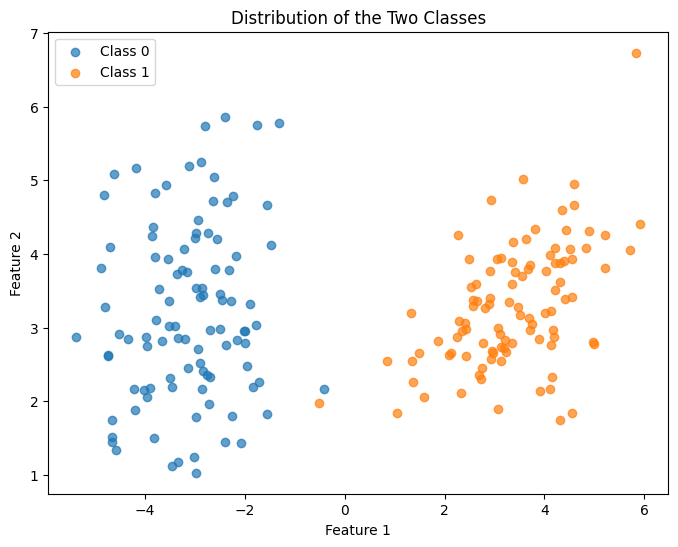

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for label in range(n_classes):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=f'Class {label}', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Distribution of the Two Classes')
plt.legend()
plt.show()

In [12]:
# Estimate the paramters µ and covariace Matrice using the training Data and a Multinomial Gaussian Distribution - without any library
import numpy as np
def estimate_parameters(X, y, n_classes):
    parameters = {}
    for label in range(n_classes):
        X_class = X[y == label]
        mu = np.mean(X_class, axis=0)
        sigma2 = np.var(X_class, axis=0)
        parameters[label] = {'mu': mu, 'sigma2': sigma2}
    return parameters
parameters = estimate_parameters(X, y, n_classes)
print("Estimated Parameters:")
for label, param in parameters.items():
    print(f"Class {label}: µ = {param['mu']}, σ² = {param['sigma2']}")


# Estimate the paramters µ and covariace Matrice using the training Data and a Multinomial Gaussian Distribution - without any library
def estimate_covariance(X, y, n_classes):
    covariance = {}
    for label in range(n_classes):
        X_class = X[y == label]
        mu = np.mean(X_class, axis=0)
        cov_matrix = np.cov(X_class, rowvar=False)
        covariance[label] = {'mu': mu, 'cov': cov_matrix}
    return covariance

print(f"Estimated Covariance Matrices: {estimate_covariance(X, y, n_classes)}")

Estimated Parameters:
Class 0: µ = [-3.1205672   3.20567852], σ² = [0.92371246 1.41960855]
Class 1: µ = [3.37514914 3.29041745], σ² = [1.25909346 0.68511214]
Estimated Covariance Matrices: {0: {'mu': array([-3.1205672 ,  3.20567852]), 'cov': array([[0.93304288, 0.13852891],
       [0.13852891, 1.43394803]])}, 1: {'mu': array([3.37514914, 3.29041745]), 'cov': array([[1.27181158, 0.47359801],
       [0.47359801, 0.69203247]])}}


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_covariance.py:630: RuntimeWarning: divide by zero encountered in matmul
  return x @ self._LP
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_covariance.py:630: RuntimeWarning: overflow encountered in matmul
  return x @ self._LP
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_covariance.py:630: RuntimeWarning: invalid value encountered in matmul
  return x @ self._LP


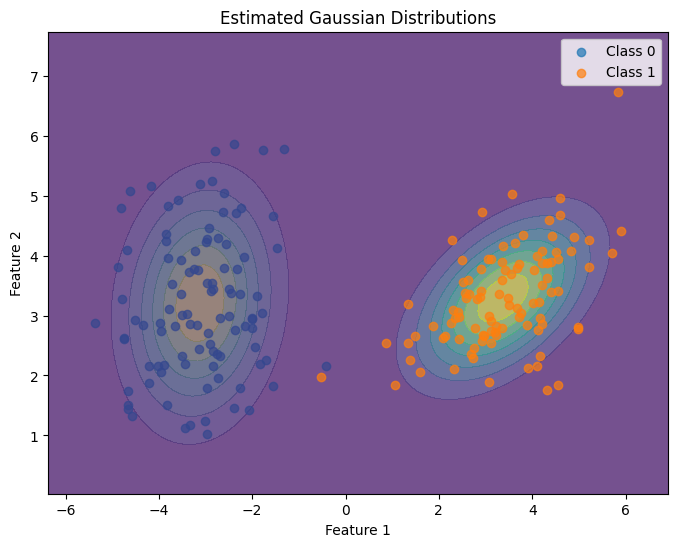

In [17]:
# Plot the estimated Gaussian distributions based on the estimated parameters
def plot_gaussian_distributions(estimate_covariance):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    plt.figure(figsize=(8, 6))
    for label in range(n_classes):
        mu = estimate_covariance[label]['mu']
        cov = estimate_covariance[label]['cov']
        Z = multivariate_normal.pdf(np.dstack((xx.ravel(), yy.ravel())), mean=mu, cov=cov)
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.5)
        plt.scatter(X[y == label, 0], X[y == label, 1], label=f'Class {label}', alpha=0.7)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Estimated Gaussian Distributions')
    plt.legend()
    plt.show()
from scipy.stats import multivariate_normal
plot_gaussian_distributions(estimate_covariance(X, y, n_classes))